This notebook describe the DCT transform used in JPEG image compression

In [1]:
import numpy as np
from numpy import pi
from numpy import cos
from numpy import zeros
from numpy import r_
from scipy import signal

import matplotlib.pylab as pylab
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
plt.close('all')

f =  [ 1.000  1.000  1.000  1.000  2.000  2.000  2.000  2.000]
Fu =  [ 4.243 -1.281  0.000  0.450  0.000 -0.301  0.000  0.255]
f_recon =  [ 1.000  1.000  1.000  1.000  2.000  2.000  2.000  2.000]
 f equal f_recon ? -> True


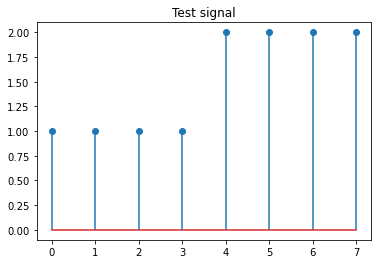

In [6]:
#%% Use DCT transform from the scipy library

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# numpy array
f = np.array([1,1,1,1,2,2,2,2], dtype='float32')
plt.stem(f) , plt.title('Test signal')
print("f = ",f)
 
# apply dct function on array
F = dct(f, norm = 'ortho')
print("Fu = ",F) # 

f_recon = idct(F, norm = 'ortho') 
print("f_recon = ",f_recon)
 
status = np.allclose(f,f_recon) 
print(" f equal f_recon ? ->", status)

In [4]:
#%% Try find the coefficient for F[0], u=0  frequency 0
u=0

cosv = np.zeros(8)
F = np.zeros(8)

for i in range(8):
    if u==0: 
        Cu = 1/np.sqrt(2)
    else: Cu=1
    cosv[i] = (Cu/2) *cos( (2*i+1)*u*pi/16)

# F[0] represent similarity between the signal in vec f with ref signal cosv(with u=0)
F[u] =  np.dot(f,cosv)    # F[0]=4.24
print(" DCT coefficient for frequency u=0 F[0] =" , F[u])

 DCT coefficient for frequency u=0 F[0] = 4.242640687119285


In [7]:
#%% Do for u = 0,1,2 ...7
for u in range(8):
    # compute ref signal for frequency u
    for i in range(8):
        i = int(i)
        if u==0: 
            Cu = 1/np.sqrt(2)
        else: Cu=1
        cosv[i] = (Cu/2) *cos( (2*i+1)*u*pi/16)
    
    F[u] = np.dot(f,cosv)  
print(F)
print('Try predict what is the most dominant frequency in the test signal')

[ 4.243 -1.281 -0.000  0.450  0.000 -0.301 -0.000  0.255]
Try predict what is the most dominant frequency in the test signal


(<StemContainer object of 3 artists>,
 Text(0.5, 1.0, 'Reference signal for u = 2'))

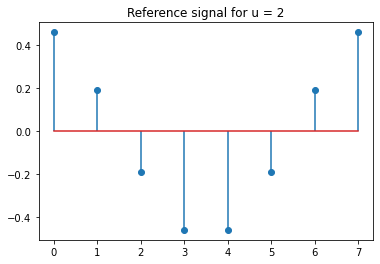

In [10]:
#%% Plot the reference signal
# matrix to store all ref signal
cosvv = np.zeros((8,8))
for u in range(8):
    # compute ref signal for frequency u
    for i in range(8):
        i = int(i)
        if u==0: 
            Cu = 1/np.sqrt(2)
        else: Cu=1
        cosvv[u,i] = (Cu/2) *cos( (2*i+1)*u*pi/16)

u=2
refSig = cosvv[u,:]
plt.stem(refSig), plt.title('Reference signal for u = {}'.format(u))

Text(0.5, 1.0, ' test signal  ')

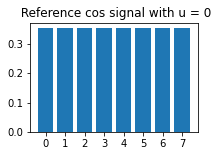

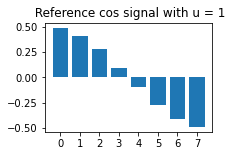

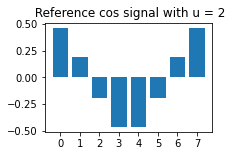

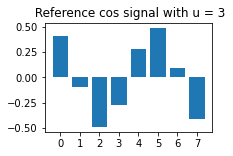

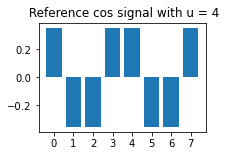

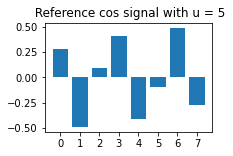

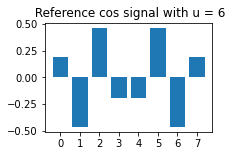

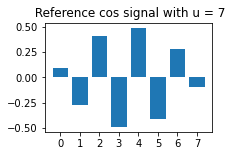

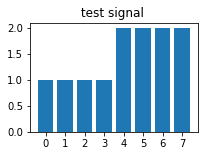

In [11]:
#%% Bar chart plot
import matplotlib.pyplot as plt
plt.close('all')
pylab.rcParams['figure.figsize'] = (3, 2)
index= np.arange(8)

for uu in range(8):
    plt.figure()
    string = " Reference cos signal with u = {}".format(uu)
    val = list(cosvv[uu,:])
    plt.bar(index,val)
    plt.xticks(index)
    plt.title(string)
    
plt.figure()
string = " test signal  "
val = list(f)
plt.bar(index,val)
plt.xticks(index)
plt.title(string)